In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import kArmedBandit
from kArmedBandit.agents.EpsilonGreedyAgent import EpsilonGreedyAgent
plt.style.use('dark_background')

In [2]:
num_runs = 2000
num_steps = 10000

epsilon = 0.1

def get_step_size_average(action_count, action):
    return 1/action_count[action]

def get_step_size_constant(action_count, action):
    return 0.1

In [3]:
def run(env, agent):
    score = 0
    averages_per_run = []
    reward = 0
    env.reset()
    for i in range(num_steps):
        action = agent.policy(reward)
        _, reward, _, _ = env.step(action)
        score += reward
        averages_per_run.append(score / (i + 1))
    return averages_per_run

In [4]:
def run_experiment(env_config, agent_config1, agent_config2):
    averages_for_runs1 = []
    averages_for_runs2 = []
    for i in range(num_runs):
        env = gym.make(env_config["name"], is_stationary=env_config["is_stationary"], seed=i)
        agent1 = agent_config1["class"](10, agent_config1["epsilon"], agent_config1["step_size_callback"])
        agent2 = agent_config2["class"](10, agent_config2["epsilon"], agent_config2["step_size_callback"])
        averages_per_run1 = run(env, agent1)
        averages_per_run2 = run(env, agent2)
        averages_for_runs1.append(averages_per_run1)
        averages_for_runs2.append(averages_per_run2)
    mean_averages1 = np.mean(averages_for_runs1, axis=0)
    mean_averages2 = np.mean(averages_for_runs2, axis=0)
    print(f"Average rewards,\nagent 1 :{mean_averages1[-1]}\nagent 2 :{mean_averages2[-1]}")
    return mean_averages1, mean_averages2

Average rewards,
agent 1 :0.6341867206584961
agent 2 :0.5149774780555119
[0.6332079002423678, -1.826927588330947, -1.0849327357844503, -2.139365193248793, -1.2920716383768738, -0.42876904736816085, 0.3417728994189456, -1.186646745345948, -0.5898142956492883, -0.28792571940300443]
[ 0.66185538 -0.40926199 -0.31533961 -0.13260594 -0.56138589 -0.69602698
 -0.13140995 -0.02351953 -0.46425044 -0.23088364]
---------------------
[-1.0434677758241786, 0.22286058274474058, -0.19860675532053404, -0.7554504385503138, -0.6817483919717024, -1.365415971595509, -2.198618977736558, -0.6051655756388131, -1.4542494076880677, -1.8943536205913118]
[-0.7081159  -0.73440936 -0.73262763 -0.91842912 -0.74355803 -0.73305979
 -0.73638427 -0.86107567 -0.70915265 -0.70848304]


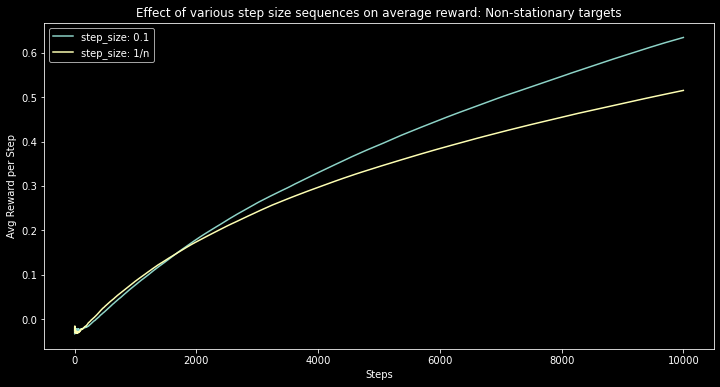

In [5]:
env_config = {"name": "TenArmedBanditFixed-v0", "is_stationary":False}
agent_config1 = {"class": EpsilonGreedyAgent, "epsilon":epsilon, "step_size_callback":get_step_size_constant}
agent_config2 = {"class": EpsilonGreedyAgent, "epsilon":epsilon, "step_size_callback":get_step_size_average}

avg1, avg2 = run_experiment(env_config, agent_config1, agent_config2)

steps = list(range(num_steps))
fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and an axes.
ax.plot(steps, avg1, label="step_size: 0.1")
ax.plot(steps, avg2, label="step_size: 1/n")
ax.grid(False)
ax.set_xlabel('Steps')  # Add an x-label to the axes.
ax.set_ylabel('Avg Reward per Step')  # Add a y-label to the axes.
ax.set_title("Effect of various step size sequences on average reward: Non-stationary targets")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [ ]:
env_config = {"name": "TenArmedBanditFixed-v0", "is_stationary":True}
agent_config1 = {"class": EpsilonGreedyAgent, "epsilon":epsilon, "step_size_callback":get_step_size_constant}
agent_config2 = {"class": EpsilonGreedyAgent, "epsilon":epsilon, "step_size_callback":get_step_size_average}

avg1, avg2 = run_experiment(env_config, agent_config1, agent_config2)

steps = list(range(num_steps))
fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and an axes.
ax.plot(steps, avg1, label="step_size: 0.1")
ax.plot(steps, avg2, label="step_size: 1/n")
ax.grid(False)
ax.set_xlabel('Steps')  # Add an x-label to the axes.
ax.set_ylabel('Avg Reward per Step')  # Add a y-label to the axes.
ax.set_title("Effect of various step size sequences on average reward: Stationary targets")  # Add a title to the axes.
ax.legend()  # Add a legend.